In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Assignment 1a)

Derivation done on paper

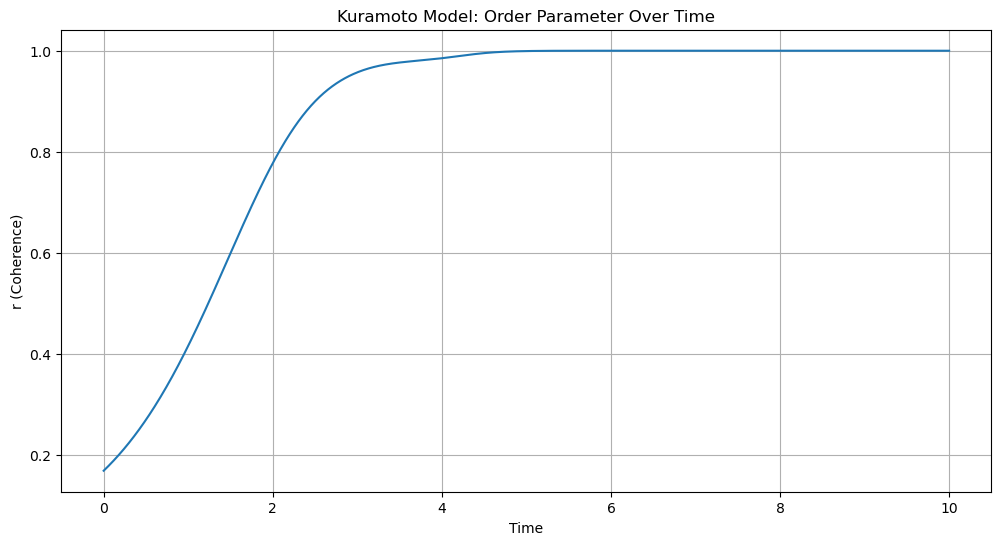

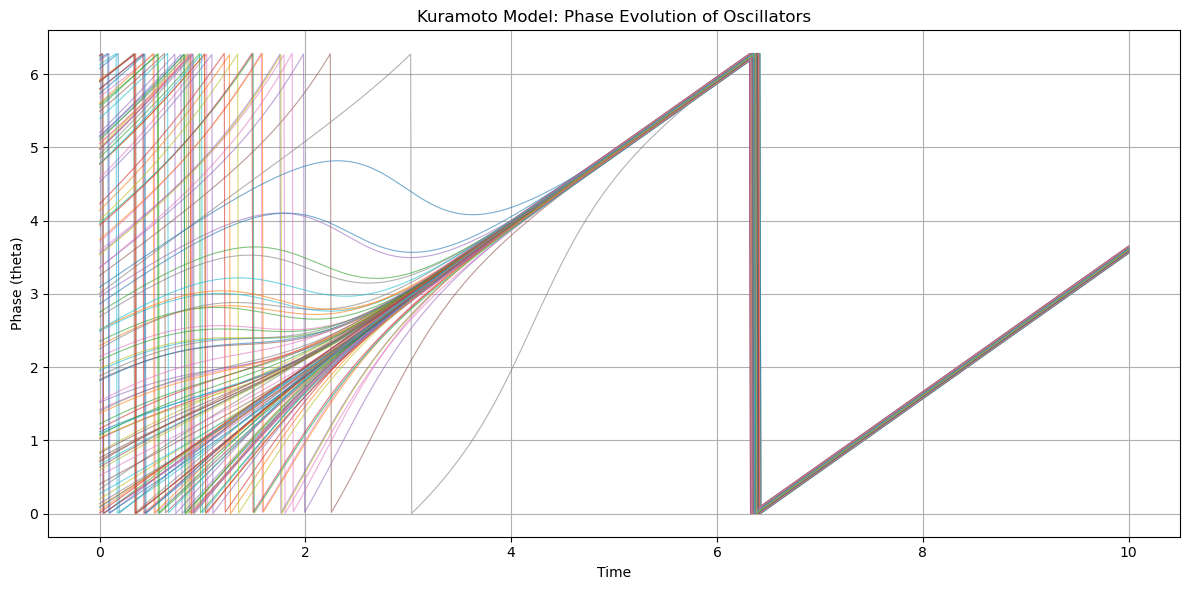

In [ ]:
#Plotting the model

np.random.seed(42)


# Parameters
N = 100  # Number of oscillators
K = 2.0  # Coupling strength
omega = np.random.uniform(0.9, 1.1, N)  # Natural frequencies (randomized)
T = 10  # Total simulation time
dt = 0.01  # Time step
steps = int(T / dt)

# Initialize phases randomly
theta = np.random.uniform(0, 2 * np.pi, N)

# Storage for phases and order parameter
theta_history = np.zeros((steps, N))
r_history = np.zeros(steps)

# Simulation
for t in range(steps):
    # Compute the order parameter
    re = np.mean(np.cos(theta))
    im = np.mean(np.sin(theta))
    r = np.sqrt(re**2 + im**2)
    Theta = np.arctan2(im, re)
    r_history[t] = r

    # Update phases
    theta += dt * (omega - K * r * np.sin(theta - Theta))
    theta %= 2 * np.pi  # Keep phases within [0, 2pi]
    theta_history[t] = theta

# Plot results
time = np.linspace(0, T, steps)

# Order parameter over time
plt.figure(figsize=(12, 6))
plt.plot(time, r_history)
plt.xlabel("Time")
plt.ylabel("r (Coherence)")
plt.title("Kuramoto Model: Order Parameter Over Time")
plt.grid()

# Phase evolution
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(time, theta_history[:, i], alpha=0.6, linewidth=0.8)
plt.xlabel("Time")
plt.ylabel("Phase (theta)")
plt.title("Kuramoto Model: Phase Evolution of Oscillators")
plt.grid()

plt.tight_layout()
plt.show()




The first plot shows the time evolution of the order parameter r, which measures the synchronization of oscillators. r starts near 0 (random phases) and increases toward 1, indicating increasing synchronization over time.

The second plot shows the individual phase trajectories of all N oscillators over time. Initially, the phases evolve independently, but they converge toward a synchronized state as time progresses. Just after 6 seconds, the trajectories become fully synchronized.

## Assignment 1b)

This equation is part of a coupled system of oscillators which we have seen in the lecture. exp(iθ) represents the state of each oscillator in the complex plane, where the phase of the oscillator corresponds to the argument of this complex number.  r exp(𝑖Θ) is the mean field, which represents the collective behavior of all the oscillators, where r represents the overall synchronization of the network of neurons/system of oscillators, and Θ is the average phase of all the oscillators. r can range from 0 to 1, the higher the r, the more synchronized the oscillators are.

## Assignment 1c)


Stable solutions exist when the natural frequencies of the different oscillators (so of the different neurons) lie within the range of Kr, which is the effective coupling strength. The dynamics of each oscillator are driven by the term Krsin(θi−Θ), which represents the force that drives oscillator i toward the average phase Θ of the system. The strength of this force is directly proportional to Kr: when Kr is large, the synchronization force is stronger, making it easier for the oscillators to synchronize. If Kr is too small, some oscillators with higher natural frequencies will be unable to synchronize. Neurons with natural frequencies outside the interval [-Kr, Kr] will fail to synchronize, as their phase difference will be too large for the coupling term to be effective. 

## Assignment 1d) step 1

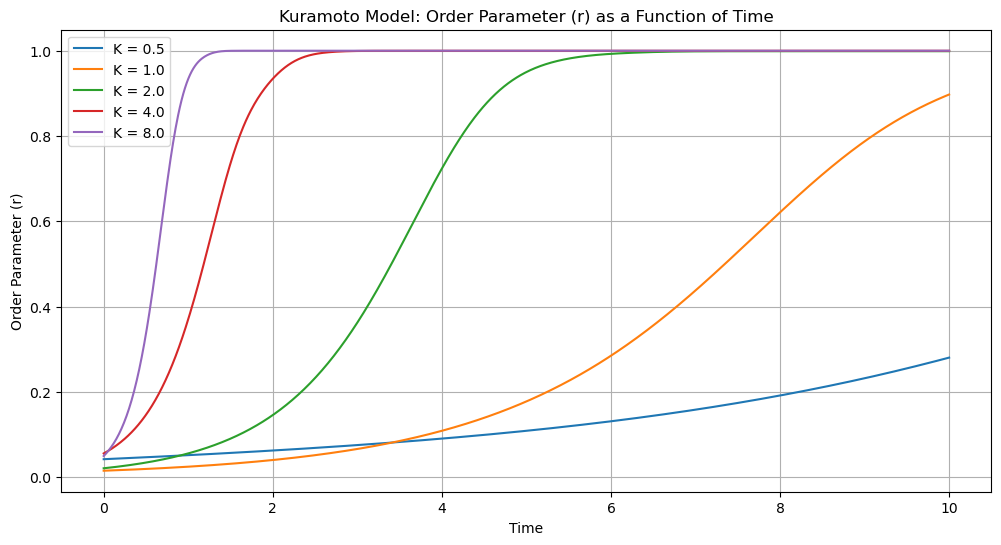

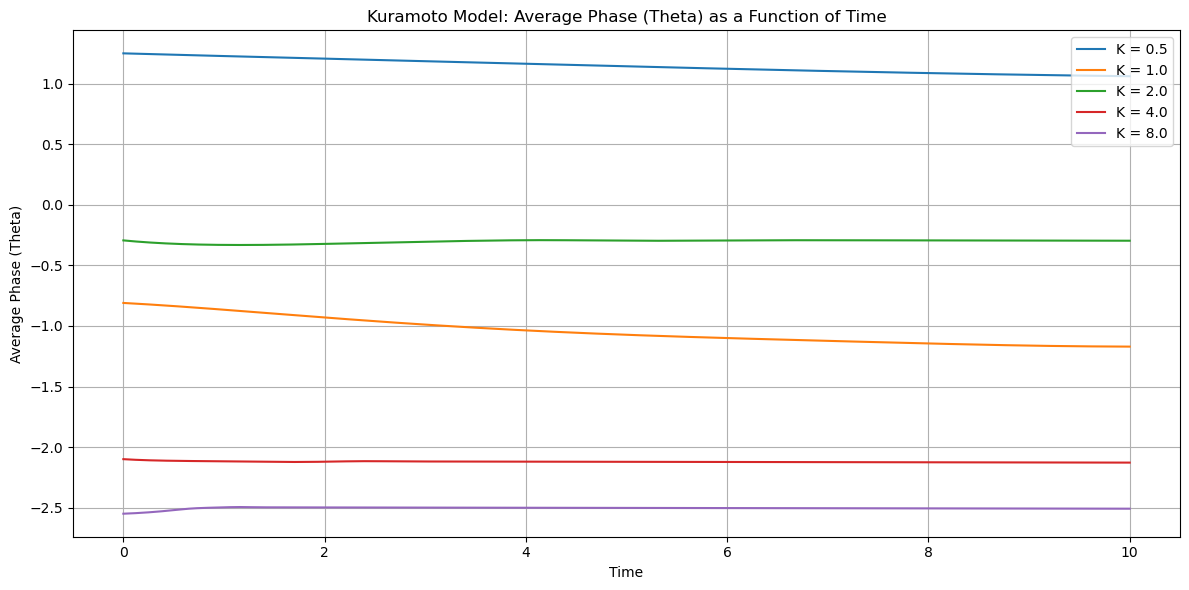

In [ ]:
np.random.seed(42)
# Updated parameters for the simulation
N = 1000  # Larger network size
omega = np.random.normal(0, 0.1, N)  # random frequencies drawn from a normal distribution
# Total simulation time and time step stay the same
T = 10  
dt = 0.01  
steps = int(T / dt)

# Values of K to test
K_values = [0.5, 1.0, 2.0, 4.0, 8.0]
r_results = {}  # To store r for each K
Theta_results = {}  # To store Theta for each K

for K in K_values:
    # Initialize phases randomly
    theta = np.random.uniform(0, 2 * np.pi, N)
    r_history = np.zeros(steps)
    Theta_history = np.zeros(steps)
    
    # Simulation
    for t in range(steps):
        # Compute the order parameter
        re = np.mean(np.cos(theta))
        im = np.mean(np.sin(theta))
        r = np.sqrt(re**2 + im**2)
        Theta = np.arctan2(im, re)
        r_history[t] = r
        Theta_history[t] = Theta

        # Update phases
        theta += dt * (omega - K * r * np.sin(theta - Theta))
        theta %= 2 * np.pi  # Keep phases within [0, 2pi]
    
    # Store results
    r_results[K] = r_history
    Theta_results[K] = Theta_history

# Plotting results for r and Theta
time = np.linspace(0, T, steps)

# Plot r as a function of time for different K values
plt.figure(figsize=(12, 6))
for K in K_values:
    plt.plot(time, r_results[K], label=f"K = {K}")
plt.xlabel("Time")
plt.ylabel("Order Parameter (r)")
plt.title("Kuramoto Model: Order Parameter (r) as a Function of Time")
plt.legend()
plt.grid()

# Plot Theta as a function of time for different K values
plt.figure(figsize=(12, 6))
for K in K_values:
    plt.plot(time, Theta_results[K], label=f"K = {K}")
plt.xlabel("Time")
plt.ylabel("Average Phase (Theta)")
plt.title("Kuramoto Model: Average Phase (Theta) as a Function of Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

The first plot shows how r evolves over time for different values of K.For smaller K's (e.g. K =0.5), the system shows low coherence, and r remains small.
As K increases, synchronization is achieved faster, and r approaches 1.
Average Phase 

The second plot shows the evolution of the average phase  over time for different K's. the behavior of the phase depends on the strength of coupling. For higher K, the phase stabilizes more quickly.At lower K, the phase fluctuates a bit more due to weaker synchronization.

## Assignment 1d) step 2

The system will typically settle into a steady state after some initial transient behavior. We can compute r over time and extract its value after the system reaches a steady state. To ensure the system reaches the steady state, we can look at the convergence behavior of r(t) over time and define a time period where the value of r(t) becomes approximately constant.

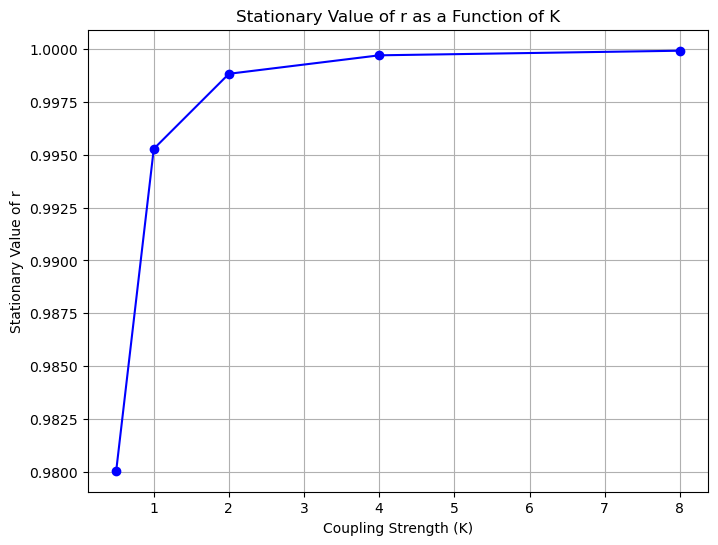

In [ ]:
T_extended = 50  # Total simulation time for stationary state
steps_extended = int(T_extended / dt)
stationary_r = []  # To store the stationary value of r for each K

for K in K_values:
    # Initialize phases randomly
    theta = np.random.uniform(0, 2 * np.pi, N)
    r_history = np.zeros(steps_extended)
    
    # Extended simulation
    for t in range(steps_extended):
        # Compute the order parameter
        re = np.mean(np.cos(theta))
        im = np.mean(np.sin(theta))
        r = np.sqrt(re**2 + im**2)
        r_history[t] = r

        # Update phases
        Theta = np.arctan2(im, re)
        theta += dt * (omega - K * r * np.sin(theta - Theta))
        theta %= 2 * np.pi  # Keep phases within [0, 2pi]

    # Take the mean of the last 20% of the r_history as the stationary value
    stationary_r.append(np.mean(r_history[int(0.8 * steps_extended):]))

# Plot stationary r as a function of K
plt.figure(figsize=(8, 6))
plt.plot(K_values, stationary_r, '-o', color='b')
plt.xlabel("Coupling Strength (K)")
plt.ylabel("Stationary Value of r")
plt.title("Stationary Value of r as a Function of K")
plt.grid()
plt.show()



## Assignment 1d) step 3

Locked oscillators have synchronized phases, and as a consequence, their phase doesn't change over time once they have reached a steady state: 𝜃i remains nearly constant over some time period. To identify the fraction of locked oscillators in the network we have defined, we have to find for which oscillators the phase is (nearly) constant, so the derivative of 𝜃i has to be close to zero for these oscillators.

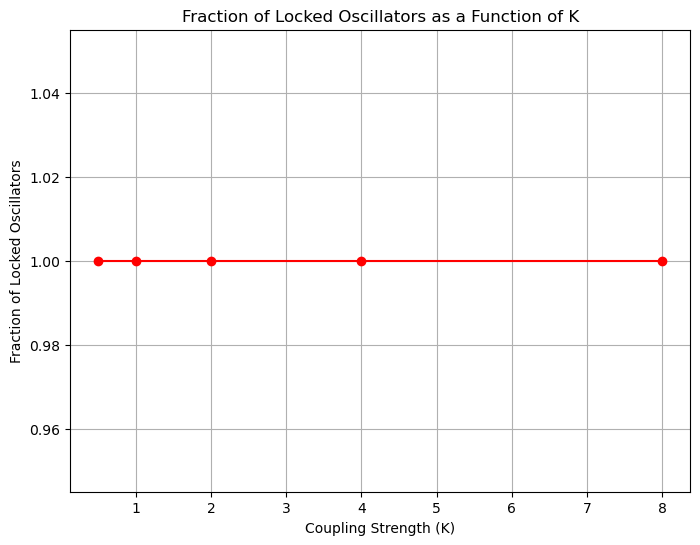

In [12]:
# Compute the fraction of locked oscillators for each K
locked_fractions = []

for K, r_stationary in zip(K_values, stationary_r):
    # Check which oscillators are locked
    locked = np.abs(omega) <= K * r_stationary
    fraction_locked = np.sum(locked) / N  # Fraction of locked oscillators
    locked_fractions.append(fraction_locked)

# Plot fraction of locked oscillators as a function of K
plt.figure(figsize=(8, 6))
plt.plot(K_values, locked_fractions, '-o', color='r')
plt.xlabel("Coupling Strength (K)")
plt.ylabel("Fraction of Locked Oscillators")
plt.title("Fraction of Locked Oscillators as a Function of K")
plt.grid()
plt.show()


In the figure we can see that the higher the coupling strength K, the more locked oscillators we find and at some point it stabilizes near 0. This makes sense, because at small values of K, there is a weak coupling strength between the neurons, and most of them will remain desynchronized. Therefore, the fraction of locked oscillators will be low. As K increases, the oscillators will become more strongly coupled, and more of them will synchronize/become locked. At K = 2, we see that the fraction of locked oscillators is nearing the maximum of 1.0, where all neurons are synchronized, which corresponds to the graphs that we made in this assignment.